In [8]:
# imports mais comuns que poderão ser necessários
import tensorflow as tf
import keras
from keras import layers

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

# constantes - dimensão das imagens
IMG_HEIGHT = 28
IMG_WIDTH = 28

# constantes - labels/classes
LABELS = ["T-Shirt/Top",
          "Trouser",
          "Pullover",
          "Dress",
          "Coat",
          "Sandal",
          "Shirt",
          "Sneaker",
          "Bag",
          "Boot"]
N_CLASSES = 10


# callbacks
BEST_MODEL_CHECKPOINT = keras.callbacks.ModelCheckpoint(
    filepath="tmp/best_model.weights.h5",      # ficheiro para os pesos do "melhor modelo"
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True)

EARLY_STOPPING = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5)

In [72]:


# carregar o dataset FASHION_MNIST
dataset = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = dataset.load_data()

# normalização
x_train = x_train / 255.0
x_test = x_test / 255.0

split = int(0.80*x_train.shape[0])

x_val = x_train[split:]
y_val = y_train[split:]

x_train = x_train[:split]
y_train = y_train[:split]


In [73]:
print("Número de amostras no training set original: " + str(x_train.shape[0]))
print("Número de amostras no test set original: " + str(x_test.shape[0]))
print("Número de amostras no set de validação: " + str(x_val.shape[0]))


Número de amostras no training set original: 48000
Número de amostras no test set original: 10000
Número de amostras no set de validação: 12000


In [74]:

# transformar vetor das labels numa matriz - adequado para a classificação
# multiclasse da Parte 1, mas não para a classificação binária da Parte 2
y_train = keras.utils.to_categorical(y_train,N_CLASSES)
y_test = keras.utils.to_categorical(y_test,N_CLASSES)
y_val = keras.utils.to_categorical(y_val,N_CLASSES)

### Parte 1 


## ex1 a.
10 diferentes categorias de roupa, para 48000 amostras de treino, 10000 de teste e 12000 validação

In [75]:
print("y_train.shape: " + str(y_train.shape))
print("y_test.shape: " + str(y_test.shape))
print("y_val.shape: " + str(y_val.shape))

y_train.shape: (48000, 10)
y_test.shape: (10000, 10)
y_val.shape: (12000, 10)


## ex1 b e c

10 classes de output 
modelo de classificação
loss function multi cross entropy classificação multi-classe


In [76]:
##Flatten faz uma imagem de 28 por 28 igual a 28*28 = 784
print(x_train[0].flatten().size)

784


## nota:
 "regras " construção das componentes da rede neural 

+ The number of hidden neurons should be between the size of the input layer and the size of the output layer.
+ The number of hidden neurons should be 2/3 the size of the input layer, plus the size of the output layer.
+ The number of hidden neurons should be less than twice the size of the input layer.

source:  Introduction to Neural Networks for Java, Second Edition

In [77]:
initializer = keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=12345)

my_model = keras.Sequential([ 
    layers.Input(shape=(28, 28)), 
    layers.Flatten(),
    layers.Dense(529, activation='relu',kernel_initializer=initializer),
    layers.Dense(10, activation='softmax', kernel_initializer=initializer)])

my_model.compile(loss="categorical_crossentropy",
                  optimizer=keras.optimizers.Adam(learning_rate=0.001),
                  metrics=["accuracy"])
#adam <=> ao gradiente descendente para otimizar os pessos das ligações entre as camadas
#loss = função de erro para categorição multiclasse 
#metrics = métrica para avaliar a performance do modelo

In [78]:
my_model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_9 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 529)            │       415,265 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 10)             │         5,300 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 420,565 (1.60 MB)

 Trainable params: 420,565 (1.60 MB)

 Non-trainable params: 0 (0.00 B)

In [79]:
h = my_model.fit(x_train, y_train, batch_size=128, epochs=50,validation_data=(x_val, y_val),callbacks=[BEST_MODEL_CHECKPOINT])

Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7637 - loss: 0.6946 - val_accuracy: 0.8344 - val_loss: 0.4548
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8593 - loss: 0.3966 - val_accuracy: 0.8655 - val_loss: 0.3824
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8747 - loss: 0.3481 - val_accuracy: 0.8705 - val_loss: 0.3647
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8810 - loss: 0.3228 - val_accuracy: 0.8730 - val_loss: 0.3504
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8916 - loss: 0.2954 - val_accuracy: 0.8866 - val_loss: 0.3161
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8989 - loss: 0.2761 - val_accuracy: 0.8783 - val_loss: 0.3475
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9005 - loss: 0.2663 - val_accuracy: 0.8847 - val_loss: 0.3240
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9062 - loss: 0.2542 - val_accuracy: 0.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


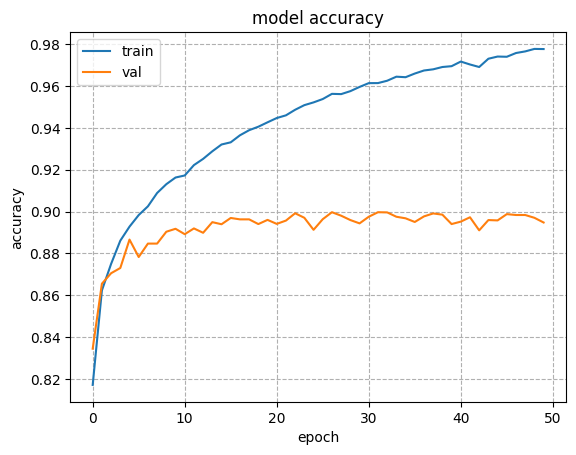

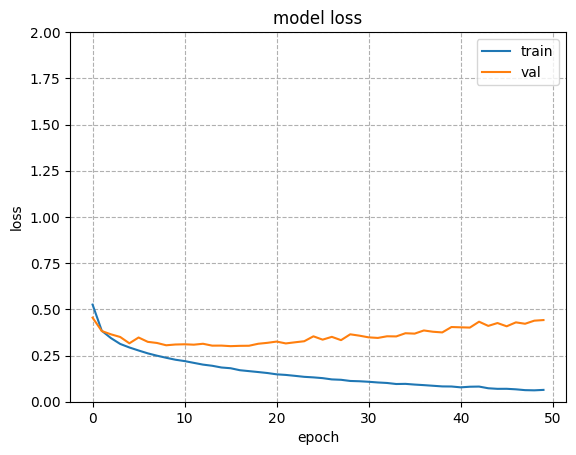

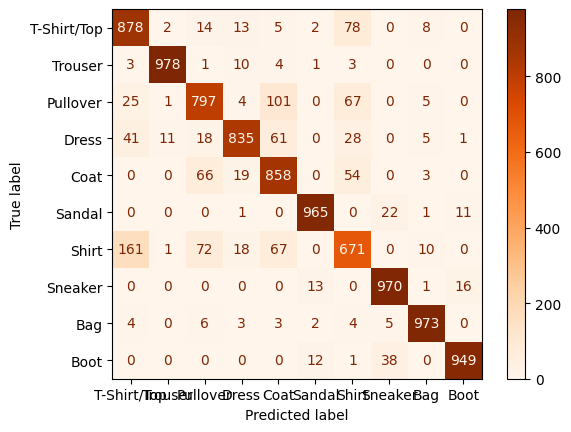

In [80]:
# Obter e mostrar resultados

# obter os id's das classes verdadeiras
y_true = np.argmax(y_test, axis=1)

# realizar as predições e obter os id's das classes preditas
output_pred = my_model.predict(x_test)    # ou então, output_pred = wineModel(x_val)
y_pred = np.argmax(output_pred, axis=1)

# gerar uma matriz de confusão
cm = confusion_matrix(y_true, y_pred)

# mostrar figuras - accuracy, loss e matriz de confusão
plt.figure(num=1)
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc="upper left")
plt.grid(True, ls='--')

plt.figure(num=2)
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('model loss')
plt.ylim(0, 2.0)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc="upper right")
plt.grid(True, ls='--')

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=LABELS)
disp.plot(cmap=plt.colormaps['Oranges'])
plt.show()